In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import json
import numpy as np
import matplotlib as mpl
import pandas as pd

plt.style.use('seaborn-v0_8-colorblind')

mpl.rcParams["hatch.color"] = 'white'

plt.rcParams['font.size'] = 16 # 10
plt.rcParams['axes.titlesize'] = 16 # large
plt.rcParams['axes.labelsize'] = 16 # medium
plt.rcParams['xtick.labelsize'] = 16 # medium
plt.rcParams['ytick.labelsize'] = 16 # medium
plt.rcParams['legend.fontsize'] = 16 # medium
plt.rcParams['figure.titlesize'] = 16 # large
                             

In [2]:
splits = ["dev", "devtest"]

## Parity

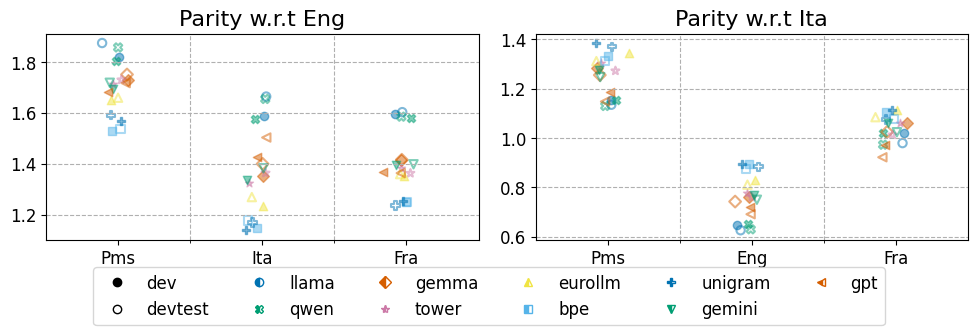

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
models = ["llama", "qwen", "gemma", "tower", "eurollm", "bpe", "unigram", "gemini", "gpt"]
markers = ['o', 'X', 'D', '*', '^', 's', 'P', 'v', '<']  

for ax, ref_lang in zip(axs, ["eng", "ita"]):
    if ref_lang == "eng":
        langs = ["pms", "ita", "fra"]
    else:
        langs = ["pms", "eng", "fra"]
    for i, model in enumerate(models):
        if not os.path.exists(f"results/parity/{model}.dev.jsonl"):
            dev_points = [-1 for _ in langs]
        else:
            dev = json.load(open(f"results/parity/{model}.dev.jsonl"))
            dev_points = [dev.get(f'parity_{l}_vs_{ref_lang}', -1) for l in langs]
        if not os.path.exists(f"results/parity/{model}.devtest.jsonl"):
            devtest_points = [-1 for _ in langs]
        else:
            devtest = json.load(open(f"results/parity/{model}.devtest.jsonl"))
            devtest_points = [devtest.get(f'parity_{l}_vs_{ref_lang}', -1) for l in langs]
        xs = np.array([1,2,3]) + np.random.normal(0, 0.05, size=3)-0.025
        ax.scatter(xs, dev_points, label=f"{model} dev", marker=mpl.markers.MarkerStyle(markers[i], fillstyle="full"), c=f"C{i}", alpha=.5)
        xs = np.array([1,2,3]) + np.random.normal(0, 0.05, size=3)-0.025
        ax.scatter(xs, devtest_points, label=f"{model} devtest", marker=mpl.markers.MarkerStyle(markers[i], fillstyle="none"), c=f"C{i}", alpha=.5)
    ax.set_xticks([1,2,3], labels=map(str.capitalize, langs))
    # ax.set_ylabel("Parity Score")
    ax.set_title(f"Parity w.r.t {ref_lang.capitalize()}")
    ax.grid(True, axis='y', linestyle='--')
    ax.grid(True, axis='x', linestyle='--', which='minor')
    ax.set_xticks([1.5,2.5], minor=True)
    ax.set_xlim(0.5, 3.5)

# colors = [mpatches.Patch(color=f"C{i}") for i in range(len(models))]
# markers = [plt.plot([], [], m, markerfacecolor='k', markeredgecolor='k')[0] for m in ['o', 'x']] 
# ax.legend(colors + markers, models + splits, loc='upper left', bbox_to_anchor=(1.05, 0.75))

model_labels = [plt.plot([], [], ls="", markerfacecoloralt='w', marker=mpl.markers.MarkerStyle(markers[i], fillstyle="left"))[0] for i in range(len(markers))]
set_labels = [plt.plot([], [], c='k', ls="", marker=mpl.markers.MarkerStyle(markers[0], fillstyle=fill))[0] for fill in ['full', 'none']]
# ax.legend(set_labels + model_labels, splits + models, loc='upper left', bbox_to_anchor=(1.05, 1))
fig.legend(set_labels + model_labels, splits + models, loc='lower center', bbox_to_anchor=(0.5, -.15), ncol=6)

plt.tight_layout()
plt.savefig("plots/parity_scores.pdf", bbox_inches='tight', dpi=300)
plt.show()


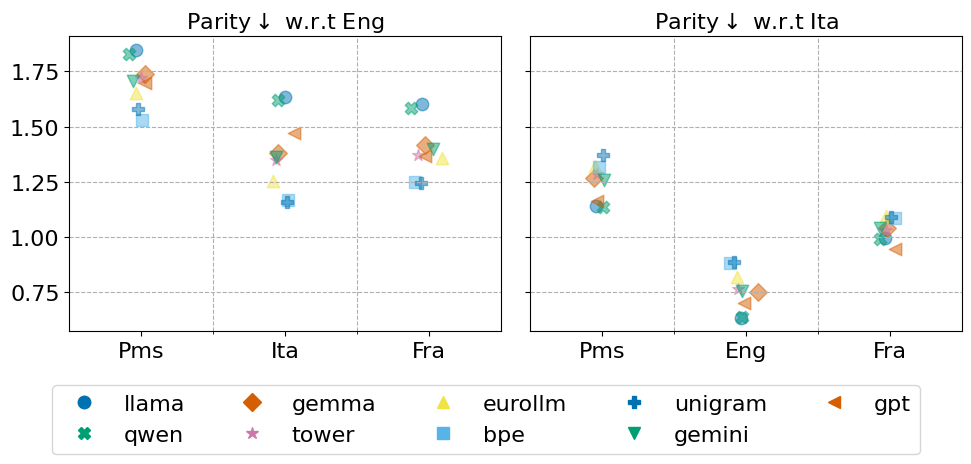

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
models = ["llama", "qwen", "gemma", "tower", "eurollm", "bpe", "unigram", "gemini", "gpt"]
markers = ['o', 'X', 'D', '*', '^', 's', 'P', 'v', '<']  

for ax, ref_lang in zip(axs, ["eng", "ita"]):
    if ref_lang == "eng":
        langs = ["pms", "ita", "fra"]
    else:
        langs = ["pms", "eng", "fra"]
    for i, model in enumerate(models):
        if not os.path.exists(f"results/parity/{model}.jsonl"):
            points = [-1 for _ in langs]
        else:
            scores = json.load(open(f"results/parity/{model}.jsonl"))
            points = [scores.get(f'parity_{l}_vs_{ref_lang}', -1) for l in langs]
        xs = np.array([1,2,3]) + np.random.normal(0, 0.05, size=3)-0.025
        ax.scatter(xs, points, label=f"{model} dev", marker=mpl.markers.MarkerStyle(markers[i], fillstyle="full", transform=mpl.transforms.Affine2D().scale(1.5)), c=f"C{i}", alpha=.5)
    ax.set_xticks([1,2,3], labels=map(str.capitalize, langs))
    # ax.set_ylabel("Parity Score")
    ax.set_title(f"Parity$\\downarrow$ w.r.t {ref_lang.capitalize()}")
    ax.grid(True, axis='y', linestyle='--')
    ax.grid(True, axis='x', linestyle='--', which='minor')
    ax.set_xticks([1.5,2.5], minor=True)
    ax.set_xlim(0.5, 3.5)

# colors = [mpatches.Patch(color=f"C{i}") for i in range(len(models))]
# markers = [plt.plot([], [], m, markerfacecolor='k', markeredgecolor='k')[0] for m in ['o', 'x']] 
# ax.legend(colors + markers, models + splits, loc='upper left', bbox_to_anchor=(1.05, 0.75))

model_labels = [plt.plot([], [], ls="", markerfacecoloralt='w', marker=mpl.markers.MarkerStyle(markers[i], fillstyle="full", transform=mpl.transforms.Affine2D().scale(1.5)))[0] for i in range(len(markers))]
fig.legend(model_labels, models, loc='lower center', bbox_to_anchor=(0.5, -.20), ncol=5)

plt.tight_layout()
plt.savefig("plots/parity_scores_avg.pdf", bbox_inches='tight', dpi=300)
plt.show()

In [4]:
score_file = "results/parity/{model}.jsonl"

models = ["llama", "qwen", "gemma", "tower", "eurollm", "bpe", "unigram", "gemini", "gpt"]
langs = ["pms", "ita", "fra", "eng"]

for ref_lang in langs:
    cols = [l for l in langs if l != ref_lang]
    tab_spec = "l" + "c" * len(cols)
    
    print("\\begin{table}[H]")
    print("\\centering\\small")
    print("\\begin{tabular}{" + tab_spec + "}")
    print("\\toprule")
    print("\\multicolumn{" + str(1 + len(cols)) + "}{c}{" + f"Parity w.r.t {ref_lang.capitalize()}" + "} \\\\")
    print("Model & " + " & ".join([c.capitalize() for c in cols]) + " \\\\")
    print("\\midrule")
    for model in models:
        file = score_file.format(model=model)
        if not os.path.exists(file):
            vals = ["-"] * len(cols)
        else:
            data = json.load(open(file))
            vals = []
            for c in cols:
                key = f"parity_{c}_vs_{ref_lang}"
                v = data.get(key, None)
                vals.append(f"{v:.3f}" if (v is not None and v >= 0) else "-")
        print(f"{model.capitalize()} & " + " & ".join(vals) + " \\\\")
    print("\\bottomrule")
    print("\\end{tabular}")
    print("\\caption{Parity scores with respect to " + ref_lang.capitalize() + "}")
    print("\\label{tab:app_parity_" + ref_lang + "}")
    print("\\end{table}")
    print("\n\n")


\begin{table}[H]
\centering\small
\begin{tabular}{lccc}
\toprule
\multicolumn{4}{c}{Parity w.r.t Pms} \\
Model & Ita & Fra & Eng \\
\midrule
Llama & 0.905 & 0.898 & 0.569 \\
Qwen & 0.909 & 0.897 & 0.576 \\
Gemma & 0.816 & 0.850 & 0.609 \\
Tower & 0.806 & 0.830 & 0.616 \\
Eurollm & 0.784 & 0.858 & 0.639 \\
Bpe & 0.783 & 0.847 & 0.687 \\
Unigram & 0.752 & 0.817 & 0.664 \\
Gemini & 0.820 & 0.853 & 0.618 \\
Gpt & 0.883 & 0.833 & 0.618 \\
\bottomrule
\end{tabular}
\caption{Parity scores with respect to Pms}
\label{tab:app_parity_pms}
\end{table}



\begin{table}[H]
\centering\small
\begin{tabular}{lccc}
\toprule
\multicolumn{4}{c}{Parity w.r.t Ita} \\
Model & Pms & Fra & Eng \\
\midrule
Llama & 1.140 & 0.998 & 0.634 \\
Qwen & 1.136 & 0.993 & 0.638 \\
Gemma & 1.267 & 1.041 & 0.749 \\
Tower & 1.284 & 1.033 & 0.767 \\
Eurollm & 1.324 & 1.097 & 0.818 \\
Bpe & 1.320 & 1.088 & 0.881 \\
Unigram & 1.373 & 1.090 & 0.887 \\
Gemini & 1.258 & 1.040 & 0.757 \\
Gpt & 1.162 & 0.945 & 0.703 \\
\bottomrule


In [7]:
refs = [f"tab:app_parity_{i}" for i in langs]
print("\\Cref{" + ",".join(refs) + "}")

\Cref{tab:app_parity_pms,tab:app_parity_ita,tab:app_parity_fra,tab:app_parity_eng}


## Classification

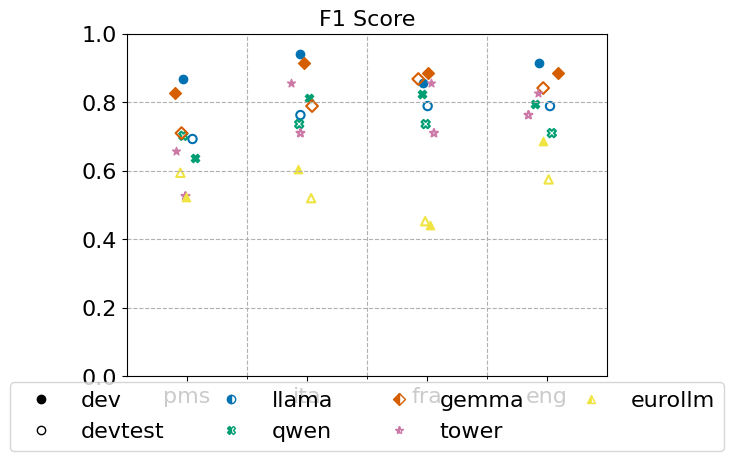

In [22]:
fig, ax = plt.subplots(figsize=(7, 5))
models = ["llama", "qwen", "gemma", "tower", "eurollm"]
langs = ["pms", "ita", "fra", "eng"]
metric = "f1"
score_file ="results/classification/{model}.{lang}.{split}.jsonl.scores"
markers = ['o', 'X', 'D', '*', '^']
for i, model in enumerate(models):
    dev_points = []
    devtest_points = []
    for lang in langs:
        dev_file = score_file.format(model=model, lang=lang, split="dev")
        devtest_file = score_file.format(model=model, lang=lang, split="devtest")
        if not os.path.exists(dev_file):
            dev_points.append(-1)
        else:
            dev = json.load(open(dev_file))
            dev_points.append(dev.get(metric, {}).get("score", -1))
        if not os.path.exists(devtest_file):
            devtest_points.append(-1)
        else:
            devtest = json.load(open(devtest_file))
            devtest_points.append(devtest.get(metric, {}).get("score", -1))
    xs = np.array([1,2,3,4]) + np.random.normal(0, 0.05, size=4)-0.025
    ax.scatter(xs, dev_points, label=f"{model} dev", marker=mpl.markers.MarkerStyle(markers[i], fillstyle="full"), c=f"C{i}", alpha=1)
    xs = np.array([1,2,3,4]) + np.random.normal(0, 0.05, size=4)-0.025
    ax.scatter(xs, devtest_points, label=f"{model} devtest", marker=mpl.markers.MarkerStyle(markers[i], fillstyle="none"), c=f"C{i}", alpha=1)
ax.set_xticks([1,2,3,4], labels=langs)
ax.set_title("F1 Score")
model_labels = [plt.plot([], [], ls="", markerfacecoloralt='w', marker=mpl.markers.MarkerStyle(markers[i], fillstyle="left"))[0] for i in range(len(markers))]
set_labels = [plt.plot([], [], c='k', ls="", marker=mpl.markers.MarkerStyle(markers[0], fillstyle=fill))[0] for fill in ['full', 'none']]
ax.legend(set_labels + model_labels, splits + models, loc='lower center', ncols=4, bbox_to_anchor=(0.5, -0.25))
ax.grid(True, axis='y', linestyle='--')
ax.grid(True, axis='x', linestyle='--', which='minor')
ax.set_xticks([1.5,2.5,3.5], minor=True)
ax.set_ylim(0, 1)
ax.set_xlim(0.5, 4.5)
plt.tight_layout()
plt.savefig("plots/classification_f1_scores.pdf", bbox_inches='tight', dpi=300)
plt.show()


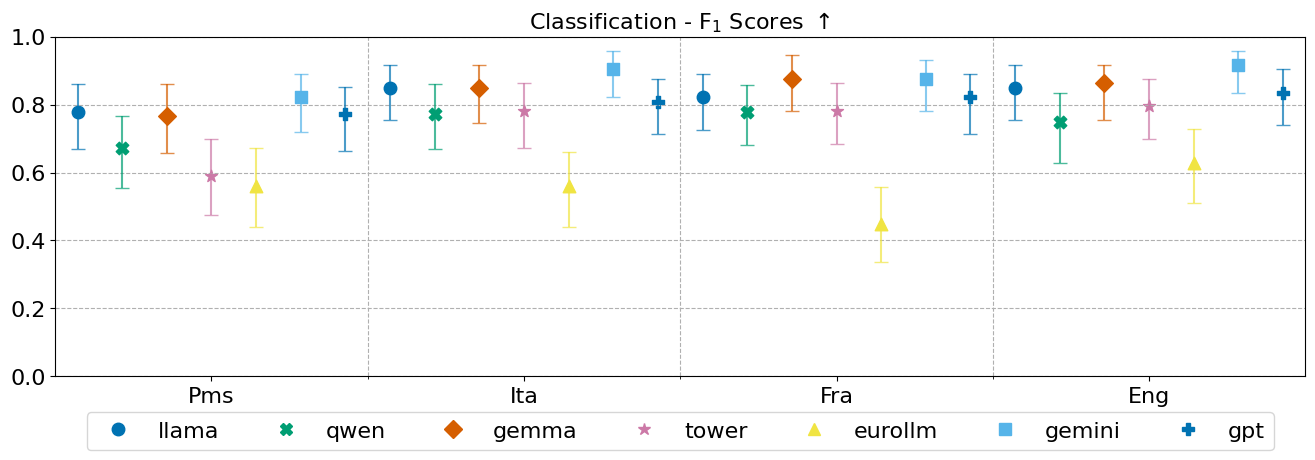

In [78]:
fig, ax = plt.subplots(figsize=(14, 5))
models = ["llama", "qwen", "gemma", "tower", "eurollm", "gemini", "gpt"]
langs = ["pms", "ita", "fra", "eng"]
metric = "f1"
score_file ="results/classification/{model}.{lang}.jsonl.scores"
markers = ['o', 'X', 'D', '*', '^', 's', 'P']
for i, model in enumerate(models):
    points = []
    errs = [[], []]
    for lang in langs:
        file = score_file.format(model=model, lang=lang)
        if not os.path.exists(file):
            points.append(-1)
            errs[0].append(0)
            errs[1].append(0)
        else:
            scores = json.load(open(file))
            points.append(scores.get(metric, {}).get("score", -1))
            ci_low = scores.get(metric, {}).get("ci_low", 0)
            ci_high = scores.get(metric, {}).get("ci_high", 0)
            errs[0].append(points[-1] - ci_low)
            errs[1].append(ci_high - points[-1])
    # xs = np.array([1,2,3,4]) + np.random.normal(0, 0.05, size=4)-0.025
    xs = np.array([1,2,3,4]) + i / len(models) - 3/7
    ax.scatter(xs, points, label=f"{model}", marker=mpl.markers.MarkerStyle(markers[i], fillstyle="full", transform=mpl.transforms.Affine2D().scale(1.5)), c=f"C{i}", alpha=1)
    ax.errorbar(xs, points, yerr=errs, fmt='none', ecolor=f"C{i}", alpha=0.7, capsize=5)
    # ax.bar(xs, points, width=0.1, color=f"C{i}", alpha=0.3)
ax.set_xticks([1,2,3,4], labels=[p.capitalize() for p in langs])
ax.set_title("Classification - F$_1$ Scores $\\uparrow$")
model_labels = [plt.plot([], [], ls="", markerfacecoloralt='w', marker=mpl.markers.MarkerStyle(markers[i], fillstyle="full", transform=mpl.transforms.Affine2D().scale(1.5)))[0] for i in range(len(markers))]
ax.legend(model_labels, models, loc='lower center', ncols=7, bbox_to_anchor=(0.5, -0.25))
ax.grid(True, axis='y', linestyle='--')
ax.grid(True, axis='x', linestyle='--', which='minor')
ax.set_xticks([1.5,2.5,3.5], minor=True)
ax.set_ylim(0, 1)
ax.set_xlim(0.5, 4.5)
plt.tight_layout()
plt.savefig("plots/classification_f1_scores_avg.pdf", bbox_inches='tight', dpi=300)
plt.show()


In [8]:
score_file ="results/classification/{model}.{lang}.jsonl.scores"
# Make a latex tabular with F1 scores. The first column is the model name, the next columns are the languages (pms, ita, fra, eng). The rows are the models. The values are the F1 scores with 3 decimal places. The std is one row below each model with the std values with 3 decimal places.
models = ["llama", "qwen", "gemma", "tower", "eurollm", "gemini", "gpt"]
langs = ["pms", "ita", "fra", "eng"]
metrics = ["f1", "precision", "recall", "accuracy"]
for metric in metrics:
    print("\\begin{tabular}{lcccc}")
    print("\\toprule")
    print("\\multicolumn{5}{c}{Metric: ", metric.capitalize(), "} \\\\")
    print("Model & " + " & ".join([l.capitalize() for l in langs]) + " \\\\")
    print("\\midrule")
    for model in models:
        scores = []
        stds = []
        for lang in langs:
            file = score_file.format(model=model, lang=lang)
            if not os.path.exists(file):
                scores.append("-")
                stds.append("-")
            else:
                data = json.load(open(file))
                metric_data = data.get(metric, {})
                score = metric_data.get("score", -1)
                ci_low = metric_data.get("ci_low", score)
                ci_high = metric_data.get("ci_high", score)
                std = metric_data.get("std", -1)
                scores.append(f"{score:.3f}")
                stds.append(f"{std:.3f}")
        print(f"\\multirow{{2}}{{*}}{{{model.capitalize()}}} & " + " & ".join(scores) + " \\\\")
        formatted_stds = [f"({s})" if s != "-" else "-" for s in stds]
        print(" & " + " & ".join(formatted_stds) + " \\\\")
    print("\\bottomrule")
    print("\\end{tabular}")
    print("\n\n")

\begin{tabular}{lcccc}
\toprule
\multicolumn{5}{c}{Metric:  F1 } \\
Model & Pms & Ita & Fra & Eng \\
\midrule
\multirow{2}{*}{Llama} & 0.778 & 0.849 & 0.822 & 0.849 \\
 & (0.047) & (0.041) & (0.044) & (0.040) \\
\multirow{2}{*}{Qwen} & 0.671 & 0.772 & 0.778 & 0.750 \\
 & (0.054) & (0.047) & (0.046) & (0.051) \\
\multirow{2}{*}{Gemma} & 0.767 & 0.849 & 0.877 & 0.863 \\
 & (0.050) & (0.042) & (0.037) & (0.041) \\
\multirow{2}{*}{Tower} & 0.589 & 0.781 & 0.781 & 0.795 \\
 & (0.057) & (0.049) & (0.049) & (0.046) \\
\multirow{2}{*}{Eurollm} & 0.579 & 0.524 & 0.479 & 0.671 \\
 & (0.058) & (0.058) & (0.057) & (0.054) \\
\multirow{2}{*}{Gemini} & 0.822 & 0.904 & 0.877 & 0.918 \\
 & (0.044) & (0.034) & (0.037) & (0.031) \\
\multirow{2}{*}{Gpt} & 0.772 & 0.808 & 0.822 & 0.836 \\
 & (0.048) & (0.045) & (0.045) & (0.042) \\
\bottomrule
\end{tabular}



\begin{tabular}{lcccc}
\toprule
\multicolumn{5}{c}{Metric:  Precision } \\
Model & Pms & Ita & Fra & Eng \\
\midrule
\multirow{2}{*}{Llama} & 0.789

## MT

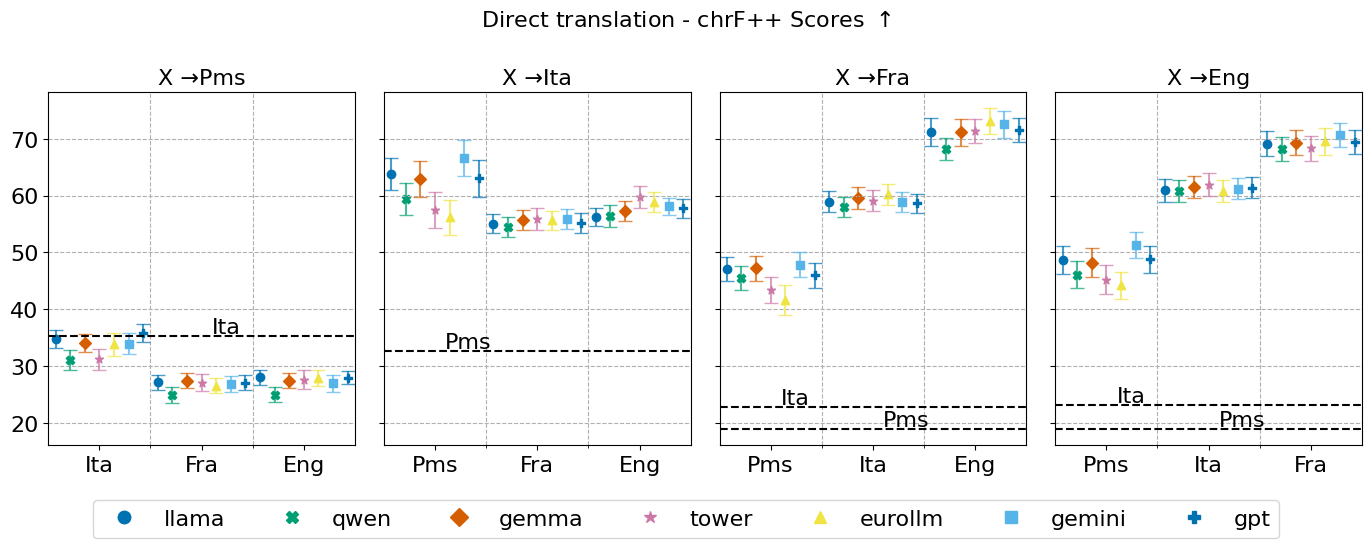

In [15]:
fig, axs = plt.subplots(1, 4, figsize=(14, 5), sharey=True)
models = ["llama", "qwen", "gemma", "tower", "eurollm", "gemini", "gpt"]
langs = ["pms", "ita", "fra", "eng"]
score_file ="results/translation/{model}.{from_lang}_{to_lang}.jsonl.scores"
baseline_file = "results/translation/baseline.{from_lang}_{to_lang}.jsonl.scores"
markers = ['o', 'X', 'D', '*', '^', 's', 'P']
metric = "chrf++"
for ax, to_lang in zip(axs.flat, langs):
    ax.set_title(f"X →{to_lang.capitalize()}")
    for i, model in enumerate(models):
        x=1
        from_langs = [i for i in langs if i != to_lang]
        for from_lang in from_langs:
            points = []
            errs = [[], []]
            file = score_file.format(model=model, from_lang=from_lang, to_lang=to_lang)
            if not os.path.exists(file):
                points.append(-1)
            else:
                scores = json.load(open(file))
                points.append(scores.get(metric, {}).get("score", -1))
                var = scores.get(metric, {}).get("confidence_var", 0)
                errs[0].append(var)
                errs[1].append(var)
            # ax.scatter([x] + np.random.normal(0, 0.05, size=1)-0.025, points, marker=mpl.markers.MarkerStyle(markers[i], fillstyle="full", transform=mpl.transforms.Affine2D().scale(1.5)), c=f"C{i}", alpha=1)
            ax.scatter([x + i / len(models) - 3 / len(models)], points, marker=mpl.markers.MarkerStyle(markers[i], fillstyle="full", transform=mpl.transforms.Affine2D().scale(1)), c=f"C{i}", alpha=1)
            ax.errorbar([x + i / len(models) - 3 / len(models)], points, yerr=errs, fmt='none', ecolor=f"C{i}", alpha=0.7, capsize=5)
            x += 1    
        ax.set_xticks([i+1 for i in range(len(from_langs))], labels=[p.capitalize() for p in from_langs])
        ax.set_xlim(0.5, len(from_langs)+0.5)
        ax.set_xticks([i+1.5 for i in range(len(from_langs)-1)], minor=True)
        ax.grid(True, axis='y', linestyle='--')
        ax.grid(True, axis='x', linestyle='--', which='minor')

# Baseline part
# Pms 
ax = axs[0]
bs = baseline_file.format(from_lang="ita", to_lang="pms")
bs_scores = json.load(open(bs))
bs_point = bs_scores.get(metric, {}).get("score", -1)
ax.axhline(bs_point, color='k', linestyle='--', label='baseline')
ax.text(2.1, bs_point + 0.5, 'Ita', color='k')
# Ita
ax = axs[1]
bs = baseline_file.format(from_lang="pms", to_lang="ita")
bs_scores = json.load(open(bs))
bs_point = bs_scores.get(metric, {}).get("score", -1)
ax.axhline(bs_point, color='k', linestyle='--', label='baseline')
ax.text(1.1, bs_point + 0.5, 'Pms', color='k')
# Fra
ax = axs[2]
bs = baseline_file.format(from_lang="ita", to_lang="fra")
bs_scores = json.load(open(bs))
bs_point = bs_scores.get(metric, {}).get("score", -1)
ax.axhline(bs_point, color='k', linestyle='--', label='baseline')
ax.text(1.1, bs_point + 0.5, 'Ita', color='k')
bs = baseline_file.format(from_lang="pms", to_lang="fra")
bs_scores = json.load(open(bs))
bs_point = bs_scores.get(metric, {}).get("score", -1)
ax.axhline(bs_point, color='k', linestyle='--')
ax.text(2.1, bs_point + 0.5, 'Pms', color='k')
# Eng
ax = axs[3]
bs = baseline_file.format(from_lang="ita", to_lang="eng")
bs_scores = json.load(open(bs))
bs_point = bs_scores.get(metric, {}).get("score", -1)
ax.axhline(bs_point, color='k', linestyle='--', label='baseline')
ax.text(1.1, bs_point + 0.5, 'Ita', color='k')
bs = baseline_file.format(from_lang="pms", to_lang="eng")
bs_scores = json.load(open(bs))
bs_point = bs_scores.get(metric, {}).get("score", -1)
ax.axhline(bs_point, color='k', linestyle='--')
ax.text(2.1, bs_point + 0.5, 'Pms', color='k')

# axs[0].set_ylabel("chrF++ Score")
fig.suptitle("Direct translation - chrF++ Scores $\\uparrow$")

model_labels = [plt.plot([], [], ls="", markerfacecoloralt='w', marker=mpl.markers.MarkerStyle(markers[i], fillstyle="full", transform=mpl.transforms.Affine2D().scale(1.5)))[0] for i in range(len(markers))]
# ax.legend(model_labels, models, loc='upper left', bbox_to_anchor=(1.05, 1))
fig.legend(model_labels, models, loc='lower center', ncols=7, bbox_to_anchor=(0.5, -0.1))
plt.tight_layout()
plt.savefig("plots/translation_chrf_avg.pdf", bbox_inches='tight', dpi=300)
plt.show()


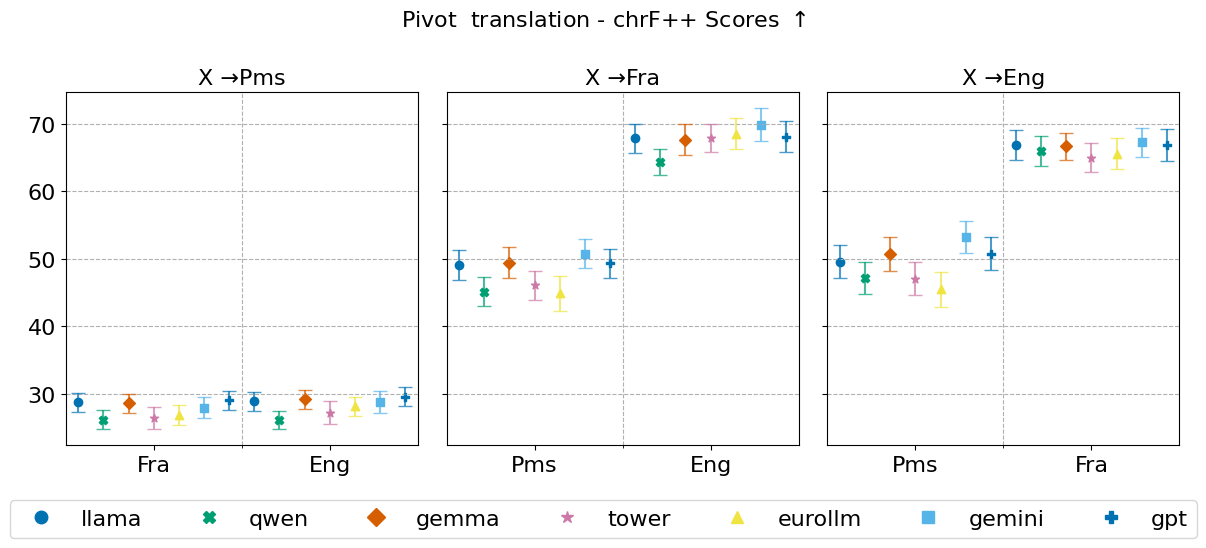

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharey=True)
models = ["llama", "qwen", "gemma", "tower", "eurollm", "gemini", "gpt"]
langs = ["pms", "fra", "eng"]
score_file ="results/translation/{model}.{from_lang}_{to_lang}.pivot_ita.jsonl.scores"
# baseline_file = "results/translation/baseline.{from_lang}_{to_lang}.jsonl.scores"
markers = ['o', 'X', 'D', '*', '^', 's', 'P']
metric = "chrf++"
for ax, to_lang in zip(axs.flat, langs):
    ax.set_title(f"X →{to_lang.capitalize()}")
    for i, model in enumerate(models):
        x=1
        from_langs = [i for i in langs if i != to_lang]
        for from_lang in from_langs:
            points = []
            errs = [[], []]
            file = score_file.format(model=model, from_lang=from_lang, to_lang=to_lang)
            if not os.path.exists(file):
                points.append(-1)
            else:
                scores = json.load(open(file))
                points.append(scores.get(metric, {}).get("score", -1))
                var = scores.get(metric, {}).get("confidence_var", 0)
                errs[0].append(var)
                errs[1].append(var)
            # ax.scatter([x] + np.random.normal(0, 0.05, size=1)-0.025, points, marker=mpl.markers.MarkerStyle(markers[i], fillstyle="full", transform=mpl.transforms.Affine2D().scale(1.5)), c=f"C{i}", alpha=1)
            ax.scatter([x + i / len(models) - 3 / len(models)], points, marker=mpl.markers.MarkerStyle(markers[i], fillstyle="full", transform=mpl.transforms.Affine2D().scale(1)), c=f"C{i}", alpha=1)
            ax.errorbar([x + i / len(models) - 3 / len(models)], points, yerr=errs, fmt='none', ecolor=f"C{i}", alpha=0.7, capsize=5)
            x += 1    
        ax.set_xticks([i+1 for i in range(len(from_langs))], labels=[p.capitalize() for p in from_langs])
        ax.set_xlim(0.5, len(from_langs)+0.5)
        ax.set_xticks([i+1.5 for i in range(len(from_langs)-1)], minor=True)
        ax.grid(True, axis='y', linestyle='--')
        ax.grid(True, axis='x', linestyle='--', which='minor')

fig.suptitle("Pivot  translation - chrF++ Scores $\\uparrow$")

model_labels = [plt.plot([], [], ls="", markerfacecoloralt='w', marker=mpl.markers.MarkerStyle(markers[i], fillstyle="full", transform=mpl.transforms.Affine2D().scale(1.5)))[0] for i in range(len(markers))]
# ax.legend(model_labels, models, loc='upper left', bbox_to_anchor=(1.05, 1))
fig.legend(model_labels, models, loc='lower center', ncols=7, bbox_to_anchor=(0.5, -0.1))
plt.tight_layout()
plt.savefig("plots/pivot_chrf_avg.pdf", bbox_inches='tight', dpi=300)
plt.show()


In [13]:
import itertools

models = ["llama", "qwen", "gemma", "tower", "eurollm", "gemini", "gpt"]
langs = ["pms", "ita", "fra", "eng"]
metrics = ["bleu", "chrf++", "ter", "comet"]
metric_names = {"bleu": "BLEU", "chrf++": "chrF++", "ter": "TER", "comet": "COMET"}
score_file = "results/translation/{model}.{from_lang}_{to_lang}.jsonl.scores"

for from_lang, to_lang in itertools.permutations(langs, 2):
    print("\\begin{table}[H]")
    print("\\centering\\small")
    print("\\begin{tabular}{lcccc}")
    print("\\toprule")
    print("\\multicolumn{5}{c}{" + f"{from_lang.capitalize()} → {to_lang.capitalize()}" + "} \\\\")
    print("Model & " + " & ".join([metric_names[m] for m in metrics]) + " \\\\")
    print("\\midrule")
    for model in models:
        scores = []
        stds = []
        for metric in metrics:
            file = score_file.format(model=model, from_lang=from_lang, to_lang=to_lang)
            if not os.path.exists(file):
                scores.append("-")
                stds.append("-")
            else:
                data = json.load(open(file))
                metric_data = data.get(metric, {})
                score = metric_data.get("score", None)
                if score is None or score < 0:
                    scores.append("-")
                else:
                    scores.append(f"{score:.3f}")
                if metric in ("bleu", "chrf++", "ter"):
                    var = metric_data.get("confidence_var", None)
                    stds.append(f"{var:.3f}" if var is not None else "-")
                else:  # comet
                    std = metric_data.get("std", None)
                    stds.append(f"{std:.3f}" if std is not None else "-")
        print(f"\\multirow{{2}}{{*}}{{{model.capitalize()}}} & " + " & ".join(scores) + " \\\\")
        formatted_stds = [f"({s})" if s != "-" else "-" for s in stds]
        print(" & " + " & ".join(formatted_stds) + " \\\\")
    print("\\bottomrule")
    print("\\end{tabular}")
    print(f"\\caption{{Translation results from {from_lang.capitalize()} to {to_lang.capitalize()}.}}")
    print(f"\\label{{tab:app_{from_lang}_{to_lang}}}")
    print("\\end{table}")
    print("\n\n")

\begin{table}[H]
\centering\small
\begin{tabular}{lcccc}
\toprule
\multicolumn{5}{c}{Pms → Ita} \\
Model & BLEU & chrF++ & TER & COMET \\
\midrule
\multirow{2}{*}{Llama} & 42.910 & 63.800 & 44.080 & 0.933 \\
 & (3.720) & (2.890) & (3.650) & (0.003) \\
\multirow{2}{*}{Qwen} & 37.490 & 59.360 & 48.890 & 0.932 \\
 & (3.730) & (2.850) & (3.810) & (0.003) \\
\multirow{2}{*}{Gemma} & 42.090 & 62.920 & 45.960 & 0.935 \\
 & (4.260) & (3.110) & (4.300) & (0.003) \\
\multirow{2}{*}{Tower} & 34.450 & 57.450 & 56.690 & 0.931 \\
 & (4.100) & (3.090) & (5.850) & (0.003) \\
\multirow{2}{*}{Eurollm} & 32.290 & 56.140 & 56.130 & 0.909 \\
 & (3.690) & (3.110) & (4.300) & (0.009) \\
\multirow{2}{*}{Gemini} & 46.290 & 66.640 & 42.450 & 0.937 \\
 & (4.310) & (3.130) & (5.390) & (0.002) \\
\multirow{2}{*}{Gpt} & 42.290 & 63.040 & 44.300 & 0.932 \\
 & (4.170) & (3.230) & (4.060) & (0.004) \\
\bottomrule
\end{tabular}
\caption{Translation results from Pms to Ita.}
\label{tab:app_pms_ita}
\end{table}



\begin

In [15]:
refs = ["tab:app_{from_lang}_{to_lang}".format(from_lang=i, to_lang=j) for i, j in itertools.permutations(langs, 2)]
print("\\Cref{" + ",".join(refs) + "}")

\Cref{tab:app_pms_ita,tab:app_pms_fra,tab:app_pms_eng,tab:app_ita_pms,tab:app_ita_fra,tab:app_ita_eng,tab:app_fra_pms,tab:app_fra_ita,tab:app_fra_eng,tab:app_eng_pms,tab:app_eng_ita,tab:app_eng_fra}


In [17]:
import itertools

models = ["llama", "qwen", "gemma", "tower", "eurollm", "gemini", "gpt"]
langs = ["pms", "fra", "eng"]
metrics = ["bleu", "chrf++", "ter", "comet"]
metric_names = {"bleu": "BLEU", "chrf++": "chrF++", "ter": "TER", "comet": "COMET"}
score_file = "results/translation/{model}.{from_lang}_{to_lang}.pivot_ita.jsonl.scores"

for from_lang, to_lang in itertools.permutations(langs, 2):
    print("\\begin{table}[H]")
    print("\\centering\\small")
    print("\\begin{tabular}{lcccc}")
    print("\\toprule")
    print("\\multicolumn{5}{c}{" + f"{from_lang.capitalize()} → {to_lang.capitalize()}, Pivot" + "} \\\\")
    print("Model & " + " & ".join([metric_names[m] for m in metrics]) + " \\\\")
    print("\\midrule")
    for model in models:
        scores = []
        stds = []
        for metric in metrics:
            file = score_file.format(model=model, from_lang=from_lang, to_lang=to_lang)
            if not os.path.exists(file):
                scores.append("-")
                stds.append("-")
            else:
                data = json.load(open(file))
                metric_data = data.get(metric, {})
                score = metric_data.get("score", None)
                if score is None or score < 0:
                    scores.append("-")
                else:
                    scores.append(f"{score:.3f}")
                if metric in ("bleu", "chrf++", "ter"):
                    var = metric_data.get("confidence_var", None)
                    stds.append(f"{var:.3f}" if var is not None else "-")
                else:  # comet
                    std = metric_data.get("std", None)
                    stds.append(f"{std:.3f}" if std is not None else "-")
        print(f"\\multirow{{2}}{{*}}{{{model.capitalize()}}} & " + " & ".join(scores) + " \\\\")
        formatted_stds = [f"({s})" if s != "-" else "-" for s in stds]
        print(" & " + " & ".join(formatted_stds) + " \\\\")
    print("\\bottomrule")
    print("\\end{tabular}")
    print(f"\\caption{{Translation results with pivoting from {from_lang.capitalize()} to {to_lang.capitalize()}.}}")
    print(f"\\label{{tab:app_{from_lang}_{to_lang}_pivot}}")
    print("\\end{table}")
    print("\n\n")

\begin{table}[H]
\centering\small
\begin{tabular}{lcccc}
\toprule
\multicolumn{5}{c}{Pms → Fra, Pivot} \\
Model & BLEU & chrF++ & TER & COMET \\
\midrule
\multirow{2}{*}{Llama} & 23.580 & 49.090 & 68.000 & 0.927 \\
 & (2.450) & (2.220) & (3.290) & (0.002) \\
\multirow{2}{*}{Qwen} & 19.890 & 45.140 & 72.630 & 0.927 \\
 & (2.460) & (2.180) & (3.190) & (0.002) \\
\multirow{2}{*}{Gemma} & 23.740 & 49.450 & 68.140 & 0.927 \\
 & (2.820) & (2.290) & (3.570) & (0.002) \\
\multirow{2}{*}{Tower} & 20.380 & 46.070 & 73.850 & 0.927 \\
 & (2.460) & (2.150) & (3.860) & (0.002) \\
\multirow{2}{*}{Eurollm} & 20.210 & 44.900 & 74.080 & 0.927 \\
 & (2.850) & (2.540) & (3.840) & (0.002) \\
\multirow{2}{*}{Gemini} & 25.600 & 50.780 & 64.740 & 0.927 \\
 & (2.410) & (2.150) & (2.930) & (0.002) \\
\multirow{2}{*}{Gpt} & 23.930 & 49.320 & 66.070 & 0.927 \\
 & (2.270) & (2.090) & (2.940) & (0.002) \\
\bottomrule
\end{tabular}
\caption{Translation results with pivoting from Pms to Fra.}
\label{tab:app_pms_fra_p

In [18]:
refs = ["tab:app_{from_lang}_{to_lang}_pivot".format(from_lang=i, to_lang=j) for i, j in itertools.permutations(langs, 2)]
print("\\Cref{" + ",".join(refs) + "}")

\Cref{tab:app_pms_fra_pivot,tab:app_pms_eng_pivot,tab:app_fra_pms_pivot,tab:app_fra_eng_pivot,tab:app_eng_pms_pivot,tab:app_eng_fra_pivot}


In [ ]:
import itertools
import pandas as pd
models = ["llama", "qwen", "gemma", "tower", "eurollm", "gemini"]
langs = ["pms", "ita", "fra", "eng"]
average_dev = {
    "bleu": pd.DataFrame(columns=langs, index=langs),
    "chrf++": pd.DataFrame(columns=langs, index=langs),
    "ter": pd.DataFrame(columns=langs, index=langs),
    "comet": pd.DataFrame(columns=langs, index=langs),
}
average_devtest = {
    "bleu": pd.DataFrame(columns=langs, index=langs),
    "chrf++": pd.DataFrame(columns=langs, index=langs),
    "ter": pd.DataFrame(columns=langs, index=langs),
    "comet": pd.DataFrame(columns=langs, index=langs),
}

for metric in ["bleu", "chrf++", "ter", "comet"]:
    for l1, l2 in itertools.permutations(langs, 2):
        dev_points = []
        devtest_points = []
        for i, model in enumerate(models):            
            if not os.path.exists(f"results/translation/{model}.dev.{l1}_{l2}.jsonl.scores"):
                dev_points.append(-1)
            else:
                dev = json.load(open(f"results/translation/{model}.dev.{l1}_{l2}.jsonl.scores"))
                dev_points.append(dev.get(metric, {}).get("score", -1))
            if not os.path.exists(f"results/translation/{model}.devtest.{l1}_{l2}.jsonl.scores"):
                devtest_points.append(-1)
            else:
                devtest = json.load(open(f"results/translation/{model}.devtest.{l1}_{l2}.jsonl.scores"))
                devtest_points.append(devtest.get(metric, {}).get("score", -1))
        average_dev[metric].loc[l1, l2] = sum(dev_points)/len(dev_points)
        average_devtest[metric].loc[l1, l2] = sum(devtest_points)/len(devtest_points)

In [209]:
print(average_dev['chrf++'].to_latex())
average_dev['chrf++']

\begin{tabular}{lllll}
\toprule
 & pms & ita & fra & eng \\
\midrule
pms & NaN & 58.798333 & 42.476667 & 45.950000 \\
ita & 32.616667 & NaN & 57.828333 & 60.975000 \\
fra & 26.453333 & 54.683333 & NaN & 70.885000 \\
eng & 27.021667 & 57.593333 & 72.250000 & NaN \\
\bottomrule
\end{tabular}



,pms,ita,fra,eng
pms,NaN,58.798333,42.476667,45.95
ita,32.616667,NaN,57.828333,60.975
fra,26.453333,54.683333,NaN,70.885
eng,27.021667,57.593333,72.25,NaN


In [210]:
print(average_devtest['chrf++'].to_latex())
average_devtest['chrf++']

\begin{tabular}{lllll}
\toprule
 & pms & ita & fra & eng \\
\midrule
pms & NaN & 62.148333 & 47.415000 & 47.771667 \\
ita & 33.228333 & NaN & 60.261667 & 61.365000 \\
fra & 26.595000 & 56.105000 & NaN & 67.895000 \\
eng & 26.973333 & 57.928333 & 70.605000 & NaN \\
\bottomrule
\end{tabular}



,pms,ita,fra,eng
pms,NaN,62.148333,47.415,47.771667
ita,33.228333,NaN,60.261667,61.365
fra,26.595,56.105,NaN,67.895
eng,26.973333,57.928333,70.605,NaN


In [211]:
import itertools
import pandas as pd
models = ["llama", "qwen", "gemma", "tower", "eurollm", "gemini"]
langs = ["pms", "fra", "eng"]
average_dev = {
    "bleu": pd.DataFrame(columns=langs, index=langs),
    "chrf++": pd.DataFrame(columns=langs, index=langs),
    "ter": pd.DataFrame(columns=langs, index=langs),
    "comet": pd.DataFrame(columns=langs, index=langs),
}
average_devtest = {
    "bleu": pd.DataFrame(columns=langs, index=langs),
    "chrf++": pd.DataFrame(columns=langs, index=langs),
    "ter": pd.DataFrame(columns=langs, index=langs),
    "comet": pd.DataFrame(columns=langs, index=langs),
}

for metric in ["bleu", "chrf++", "ter", "comet"]:
    for l1, l2 in itertools.permutations(langs, 2):
        dev_points = []
        devtest_points = []
        for i, model in enumerate(models):            
            if not os.path.exists(f"results/translation/{model}.dev.{l1}_{l2}.pivot_ita.jsonl.scores"):
                dev_points.append(-1)
            else:
                dev = json.load(open(f"results/translation/{model}.dev.{l1}_{l2}.pivot_ita.jsonl.scores"))
                dev_points.append(dev.get(metric, {}).get("score", -1))
            if not os.path.exists(f"results/translation/{model}.devtest.{l1}_{l2}.pivot_ita.jsonl.scores"):
                devtest_points.append(-1)
            else:
                devtest = json.load(open(f"results/translation/{model}.devtest.{l1}_{l2}.pivot_ita.jsonl.scores"))
                devtest_points.append(devtest.get(metric, {}).get("score", -1))
        average_dev[metric].loc[l1, l2] = sum(dev_points)/len(dev_points)
        average_devtest[metric].loc[l1, l2] = sum(devtest_points)/len(devtest_points)

In [212]:
print(average_dev['chrf++'].to_latex(na_rep='-', float_format="%.2f"))
average_dev['chrf++']

\begin{tabular}{llll}
\toprule
 & pms & fra & eng \\
\midrule
pms & - & 44.62 & 46.91 \\
fra & 27.67 & - & 67.71 \\
eng & 28.07 & 67.96 & - \\
\bottomrule
\end{tabular}



,pms,fra,eng
pms,NaN,44.625,46.906667
fra,27.671667,NaN,67.706667
eng,28.068333,67.96,NaN


In [213]:
print(average_devtest['chrf++'].to_latex(na_rep='-', float_format="%.2f"))
average_devtest['chrf++']

\begin{tabular}{llll}
\toprule
 & pms & fra & eng \\
\midrule
pms & - & 49.57 & 49.91 \\
fra & 27.11 & - & 65.11 \\
eng & 27.85 & 67.63 & - \\
\bottomrule
\end{tabular}



,pms,fra,eng
pms,NaN,49.575,49.911667
fra,27.108333,NaN,65.113333
eng,27.848333,67.628333,NaN


## Alignment

In [3]:
with open("results/align/ita_pms.eflomal.scores") as f:
    eflomal_scores = json.load(f)
with open("results/align/ita_pms.simalign.scores") as f:
    simalign_scores = json.load(f)

In [4]:
eflomal_scores

{'Precision': 0.817, 'Recall': 0.735, 'F1': 0.774, 'AER': 0.226}

In [5]:
simalign_scores

{'Precision': 0.726, 'Recall': 0.496, 'F1': 0.589, 'AER': 0.411}

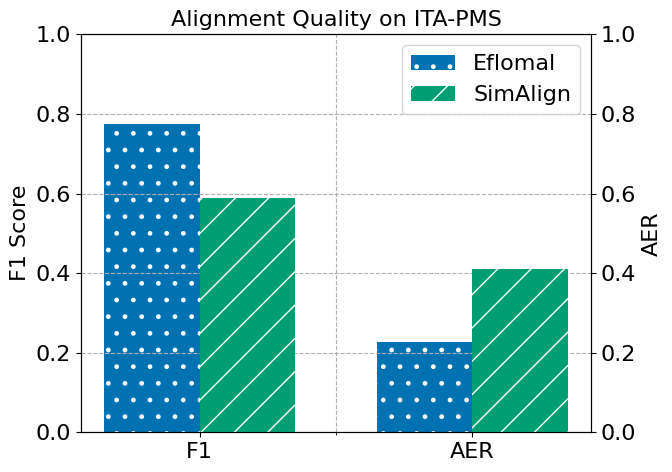

In [6]:
# Plot bar plot comparing eflomal and simalign with two y axes, one for F1 and one for AER
fig, ax1 = plt.subplots(figsize=(7,5))
x = np.arange(2)
width = 0.35
bar1 = ax1.bar(x - width/2, [eflomal_scores['F1'], eflomal_scores['AER']], width, label='Eflomal', color='C0', hatch='.')
ax1.set_ylabel('F1 Score')
ax1.set_ylim(0, 1.)
ax1.set_xticks(x, ['F1', 'AER'])
ax2 = ax1.twinx()
bar2 = ax2.bar(x + width/2, [simalign_scores['F1'], simalign_scores['AER']], width, label='SimAlign', color='C1', hatch='/')
ax2.set_ylabel('AER')
ax2.set_ylim(0, 1.)
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
ax1.grid(True, axis='y', linestyle='--')
ax1.set_xticks([0.5], minor=True)
ax1.grid(True, axis='x', linestyle='--', which='minor')
plt.title("Alignment Quality on ITA-PMS")
plt.tight_layout()
plt.savefig("plots/alignment.pdf")

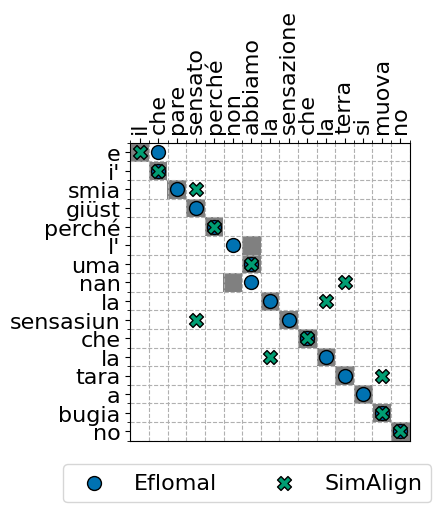

In [10]:
# Plot a word alignment example: reference as colored background, methods as markers
fig, ax = plt.subplots()#figsize=(5,5))
sentence_ita = "il che pare sensato perché non abbiamo la sensazione che la terra si muova no"
sentence_pms = "e i' smia giüst perché l' uma nan la sensasiun che la tara a bugia no"

ita_words = sentence_ita.split()
pms_words = sentence_pms.split()

ref_src = "0-0 1-1 2-2 3-3 4-4 5-7 6-5 6-6 7-8 8-9 9-10 10-11 11-12 12-13 13-14 14-15"
eflomal_alignment = "1-0 1-1 2-2 3-3 4-4 5-5 6-6 6-7 7-8 8-9 9-10 10-11 11-12 12-13 13-14 14-15"
simalign_alignment = "0-0 1-1 3-2 3-9 4-4 6-6 7-11 9-10 10-8 11-7 13-12 13-14 14-15"

ref_matrix = np.zeros((len(pms_words), len(ita_words)))

for pair in ref_src.split():
    try:
        ita_idx, pms_idx = map(int, pair.split('-'))
    except ValueError:
        continue
    if 0 <= pms_idx < ref_matrix.shape[0] and 0 <= ita_idx < ref_matrix.shape[1]:
        ref_matrix[pms_idx, ita_idx] = 1

# methods to plot as markers (exclude the reference)
method_specs = [
    ("Eflomal", eflomal_alignment, "o", "C0", 0),
    ("SimAlign", simalign_alignment, "X", "C1",  0.00),
]

# Plot reference background (colored squares)
cmap_ref = mpl.colors.ListedColormap(["white", "k"])
ax.imshow(ref_matrix, cmap=cmap_ref, interpolation="nearest", aspect="equal", alpha=0.5, zorder=0)

# overlay method markers parsed from their own alignment strings
for name, align_str, marker, color, xoff in method_specs:
    xs_m = []
    ys_m = []
    
    for pair in align_str.split():
        try:
            ita_idx, pms_idx = map(int, pair.split('-'))
        except ValueError:
            continue
        if 0 <= pms_idx < len(pms_words) and 0 <= ita_idx < len(ita_words):
            xs_m.append(ita_idx + xoff)
            ys_m.append(pms_idx)    
    ax.scatter(xs_m, ys_m, marker=marker, c=color, s=100, edgecolor="k", label=name, zorder=3)

ax.set_xticks(np.arange(len(ita_words)))
ax.set_xticklabels(ita_words, rotation=90)
ax.set_yticks(np.arange(len(pms_words)))
ax.set_yticklabels(pms_words)
ax.set_xlim(-0.5, len(ita_words) - 0.5)
ax.set_ylim(len(pms_words) - 0.5, -0.5)  # flip y to match matrix row=0 at top
ax.set_xticks(np.arange(-0.5, len(ita_words), 1), minor=True)
ax.set_yticks(np.arange(-0.5, len(pms_words), 1), minor=True)   
ax.xaxis.tick_top()

ax.grid(True, axis='both', linestyle='--', which='minor')

# single legend for the figure (only methods)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=len(handles), bbox_to_anchor=(0.5, -0.1))
plt.tight_layout()
plt.savefig("plots/alignment_example.pdf", bbox_inches='tight', dpi=300)

In [13]:
import pandas as pd

devtest = pd.read_json("data/pms_devtest.jsonl", lines=True)
dev = pd.read_json("data/pms_dev.jsonl", lines=True)


(array([43., 50., 27.,  0., 16.,  5.,  0.,  1.,  2.,  1.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

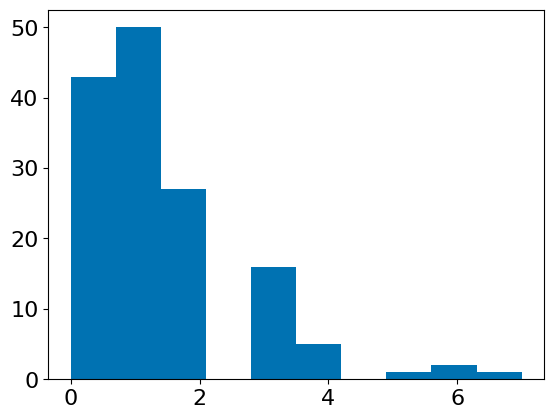

In [18]:
tmp = [len(i) if i is not None else 0 for i in devtest['review_scores'].to_list()] + [len(i) if i is not None else 0 for i in dev['review_scores'].to_list()]
plt.hist(tmp)